/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


read data ...
read data ...
0.74266267
[('يحفظ', 0.9649225473403931), ('يحمي', 0.9645230770111084), ('خير', 0.9620941877365112), ('بجاه', 0.9610742926597595), ('يبعد', 0.9609023332595825), ('بقدرة', 0.9597678780555725), ('وتقول', 0.9588764309883118), ('معاكم', 0.9587302207946777), ('يستر', 0.9585273265838623), ('ويحمي', 0.9561843276023865)]
[ 0.45068473 -0.8462414   0.5832316   0.40898705  0.05889185 -0.2784265
  0.46690813  0.36271772  0.08209054  0.48929024  0.11470528 -0.00621632
 -0.15139826  0.4893777   0.02610843 -0.35906425 -0.81217337  0.71586233
 -0.35071158  0.2957362  -0.24256998 -0.17326966 -0.3518965  -0.05075815
 -0.6188059   0.41088492 -0.67166317  0.3653338   0.40013894  0.02071519
  0.03258529  0.45378593  0.08258116  0.17920454 -0.44522253  0.01751294
 -0.1529271   0.220601    0.12628485  0.09866462  0.50684804 -0.21796924
  0.7028969   0.14266104 -0.3039239   0.85629755  0.23440786 -0.16402645
  0.22795436 -0.06571603  0.48577645 -0.03205692 -0.24157508 -0.05585913
 

IndexError: list index out of range

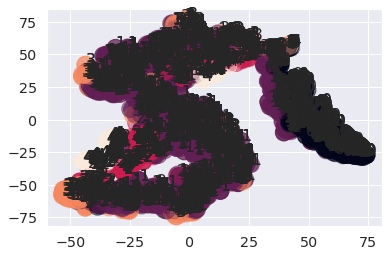

In [1]:
import collections
import random
import re
from collections import Counter
from itertools import islice
import nltk
from nltk.corpus import stopwords
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
import emoji
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
from sklearn.metrics import f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import gensim
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
np.random.seed(37)                             
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics                           
arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', str(text))
    return text



def remove_repeating_char(text):
    # return re.sub(r'(.)\1+', r'\1', text)     # keep only 1 repeat
    return re.sub(r'(.)\1+', r'\1\1', text)  # keep 2 repeat

def process_text(text, grams=False):
    clean_text = remove_diacritics(text)
    clean_text = remove_repeating_char(clean_text)
    if grams is False:
        return clean_text.split()
    else:
        tokens = clean_text.split()
        grams = list(window(tokens))
        grams = [' '.join(g) for g in grams]
        grams = grams + tokens
        return grams


def window(words_seq, n=2):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(words_seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result
def document_features(document, corpus_features):
    document_words = set(document)
    features = {}
    for word in corpus_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features


all_features = list()
texts = list()
data_labels = list()

negative_file = open("../input/ts-naim-mhedhbi/negative_tweets.txt", encoding ="utf8")
positive_file = open("../input/ts-naim-mhedhbi/positive_tweets.txt", encoding ="utf8")

n_grams_flag = False
min_freq = 13

print('read data ...')
print('read data ...')
# read positive data
for line in positive_file:
    
    text_features = process_text(line, grams=n_grams_flag)
    stop_words = set(stopwords.words('arabic'))
    text_features = [w for w in text_features if not w in stop_words]
    all_features += text_features
    texts.append(text_features)
    data_labels.append('pos')

for line in negative_file:
    
    text_features = process_text(line, grams=n_grams_flag)
    stop_words = set(stopwords.words('arabic'))
    text_features = [w for w in text_features if not w in stop_words]
    all_features += text_features
    texts.append(text_features)
    data_labels.append('neg')

 
df = pd.DataFrame(list(zip(texts, data_labels)),
              columns=['texts','data_labels'])

from gensim.models import Word2Vec
model = Word2Vec(df['texts'], min_count=10)

print (model.similarity('الصحة', 'الناس'))
print (model.most_similar(positive=['تونس'], negative=[], topn=10))
print (model['الصحة'])
print (list(model.wv.vocab))

print (len(list(model.wv.vocab)))

X = model[model.wv.vocab]
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
words = list(model.wv.vocab)
for i, word in enumerate(words):
    words_clusters = word + ":" + str(assigned_clusters[i])
    print (words_clusters)
    

          
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_    

print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print ("Silhouette_score: ")
print (silhouette_score)

import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(df['texts'])):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  df['texts'][j]))
 
 
plt.show() 




    
"""
from nltk.cluster import KMeansClusterer
import nltk
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in df['texts']:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X)    

# note with some version you would need use this (without wv) 
#  model[model.vocab] 
print (model[model.wv.vocab])

print (model.similarity('الراجحي', 'الاهلي'))
print (model.most_similar(positive=['العالمي'], negative=[], topn=2))
"""